#Sentiment Analysis - Cornell Moview Review Dataset (Pang and Lee)

The dataset (polarity v2) used in this example can be found at http://www.cs.cornell.edu/people/pabo/movie-review-data/

Paper: [A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts](http://www.cs.cornell.edu/home/llee/papers/cutsent.pdf).

##Feature learning and extraction

This notebook creates a logistic regression classifier from training data generated from [Graphify](http://github.com/graphify/graphify), a graph-based natural language processing library. Graphify performs feature extraction and creates training data in the form of tf-idf over a set of n-grams extracted probabilistically using a combination of a decision tree and evolutionary algorithm.

Each class node represents a label for a movie review (either negative or positive) and is used as a document for calculating the tf-idf weighting for the feature vectors. A decision tree of patterns activates over an unlabeled input (a movie review), creating a binary feature vector that is weighted using tf-idf. The result is a vector of scalars used to train a logistic regression classifier.

Saving movie-sentiment-3.png to movie-sentiment-3 (1).png


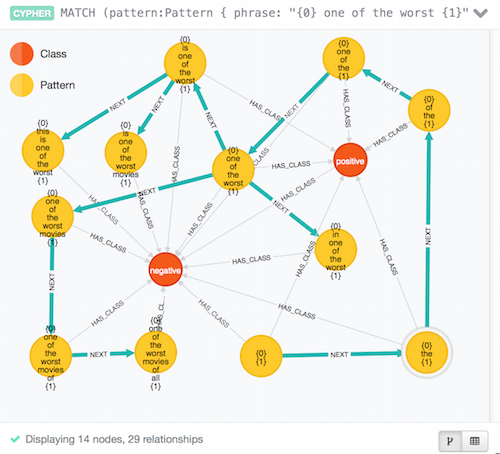

In [ ]:

from google.colab import files
uploaded = files.upload()
from IPython.display import Image
Image('movie-sentiment-3.png')

#Load training dataset

In [ ]:
%matplotlib inline
from google.colab import files
uploaded = files.upload()
from numpy import *
import matplotlib.pyplot as plt
X_data = loadtxt("X_train.txt") 
print(X_data.shape)
X = X_data

Saving X_train.txt to X_train.txt
(2000, 4840)


There are 2000 training examples and 4840 features for each row of the training examples.

In [ ]:
from google.colab import files
uploaded = files.upload()
y_data = loadtxt("y_train.txt", dtype = int) 
print(y_data.shape)
y = y_data

Saving y_train.txt to y_train.txt
(2000,)


The `y_data` is used to train and test the learning model and indicates a 0 or 1 value, 0=negative review and 1=positive review. The length of 2000 for y corresponds to the training label for each row in X_data.

The dataset consists of 1000 negative examples and 1000 positive examples of movie reviews. In the raw data, the first 1000 feature vectors correspond to positive examples and the last 1000 correspond to negative examples. Before training the model, we need to shuffle the data and then slice 1000 training rows and 1000 test rows.

In [ ]:
from sklearn.utils import shuffle
X_new, y_new = shuffle(X, y)

X_train = X_new[:1000]
y_train = y_new[:1000]
X_test = X_new[1000:]
y_test = y_new[1000:]

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

##Train the model
Fit the logistic regression model to 1000 rows of the training data and test the accuracy by predicting on the training data that was used to build the model. The lower the accuracy is on the training set, may be an indication of over fitting.

In [ ]:
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
print("Accuracy on training set:", logreg.score(X_train, y_train))

Accuracy on training set: 0.994


##Test the model

Test the learning model on the remaining 1000 test rows that were not used to train the model.

In [ ]:
y_pred_test = logreg.predict(X_test)
print("Accuracy on test set:", logreg.score(X_test, y_test))

Accuracy on test set: 0.894


The accuracy of this classifier compared to the [`Stanford Large Movie Review Dataset`](http://ai.stanford.edu/~amaas//data/sentiment/)  may have a lot to do with the number of features and the length of each movie review used to generate the weighted feature vector. This accuracy would be at or near state of the art, but would need additional scruntiny from others to ensure that I didn't mess something up. :)